## Data Acquistion Exercises

In [1]:
import env
import acquire
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings(action='ignore')
import matplotlib.pyplot as plt
import seaborn as sns

1. Use a an SQL Query containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

In [2]:
df = acquire.get_iris_data()

- Print the first 3 rows

In [3]:
df.head(3)

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa


- Print the number of rows and columns (shape)

In [4]:
df.shape

(150, 7)

- Print the column names

In [5]:
df.columns

Index(['species_id', 'measurement_id', 'sepal_length', 'sepal_width',
       'petal_length', 'petal_width', 'species_name'],
      dtype='object')

- Print the data type of each column

In [6]:
df.dtypes

species_id          int64
measurement_id      int64
sepal_length      float64
sepal_width       float64
petal_length      float64
petal_width       float64
species_name       object
dtype: object

- Print the summary statistics for each of the numeric variables. Would you recommend rescaling the data based on these statistics?

In [7]:
df.describe()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,2.000000,75.500000,5.843333,3.057333,3.758000,1.199333
std,0.819232,43.445368,0.828066,0.435866,1.765298,0.762238
min,1.000000,1.000000,4.300000,2.000000,1.000000,0.100000
25%,1.000000,38.250000,5.100000,2.800000,1.600000,0.300000
50%,2.000000,75.500000,5.800000,3.000000,4.350000,1.300000
75%,3.000000,112.750000,6.400000,3.300000,5.100000,1.800000
max,3.000000,150.000000,7.900000,4.400000,6.900000,2.500000


** I would not recommend rescaling the data because the values are all on the same scale.

2. Read Table1_CustDetails the excel module dataset, Excel_Exercises.xlsx, into a dataframe, df_excel

In [8]:
df_excel = pd.read_excel('Excel_Exercises.xlsx', sheet_name=0)

- Assign the first 100 rows to a new dataframe, df_excel_sample

In [9]:
df_excel_sample = df_excel[:100]

- Print the number of rows of your original dataframe

In [10]:
len(df_excel.index)

7049

- Print the first 5 column names

In [11]:
list(df_excel.columns[:5])

['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents']

- Print the column names that have a data type of object

In [12]:
num_cols = list(df_excel.dtypes[df_excel.dtypes=='object'].index)

- Compute the range for each of the numeric variables.

In [13]:
df_excel.describe()

,is_senior_citizen,phone_service,internet_service,contract_type,monthly_charges,total_charges
count,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7038.000000
mean,0.162009,1.324585,1.222585,0.690878,64.747014,2283.043883
std,0.368485,0.642709,0.779068,0.833757,30.099460,2266.521984
min,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000
25%,0.000000,1.000000,1.000000,0.000000,35.450000,401.587500
50%,0.000000,1.000000,1.000000,0.000000,70.350000,1397.100000
75%,0.000000,2.000000,2.000000,1.000000,89.850000,3793.775000
max,1.000000,2.000000,2.000000,2.000000,118.750000,8684.800000


3. Read the data from this google sheet into a dataframe, df_google

In [14]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_googlesheet = pd.read_csv(csv_export_url)

- Print the first 3 rows

In [15]:
df_googlesheet.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


- Print the number of rows and columns

In [16]:
df_googlesheet.shape

(891, 12)

- Print the column names

In [17]:
df_googlesheet.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

- Print the data type of each column

In [18]:
df_googlesheet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


- Print the summary statistics for each of the numeric variables

In [19]:
df_googlesheet.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- Print the unique values for each of your categorical variables

In [20]:
for col in df_googlesheet:
    if df_googlesheet[col].dtype=='O':
       print(df_googlesheet[col].value_counts()[0:5])

Becker, Master. Richard F      1
Strandberg, Miss. Ida Sofia    1
Elias, Mr. Joseph Jr           1
Plotcharsky, Mr. Vasil         1
Skoog, Master. Harald          1
Name: Name, dtype: int64
male      577
female    314
Name: Sex, dtype: int64
347082      7
1601        7
CA. 2343    7
3101295     6
CA 2144     6
Name: Ticket, dtype: int64
G6             4
B96 B98        4
C23 C25 C27    4
C22 C26        3
F33            3
Name: Cabin, dtype: int64
S    644
C    168
Q     77
Name: Embarked, dtype: int64


## Data Preperation Exercises

1. Iris Data

- Use the function defined in acquire.py to load the iris data.

In [21]:
from acquire import get_iris_data

iris_df = get_iris_data()
iris_df.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


- Drop the species_id and measurement_id columns.

In [22]:
iris_df.drop(columns = ['species_id', 'measurement_id'], inplace = True)

- Rename the species_name column to just species.

In [23]:
iris_df['species'] = iris_df['species_name']

- Encode the species name using a sklearn label encoder. Research the inverse_transform method of the label encoder. How might this be useful?

In [24]:
encoder = LabelEncoder()

encoder.fit(iris_df.species)

iris_df.species = encoder.transform(iris_df.species)

- Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [25]:
def prep_iris(iris_df):
    iris_df.drop(columns=['species_id', 'measurement_id'], inplace=True)
    iris_df.rename(columns={'species_name':'species'}, inplace=True)
    encoder = LabelEncoder()
    encoder.fit(iris_df.species)
    iris_df.species = encoder.transform(iris_df.species)
    return iris_df

2. Titanic Data

- Use the function you defined in acquire.py to load the titanic data set.

In [26]:
from acquire import get_titanic_data

titanic = get_titanic_data()

- Handle the missing values in the embark_town and embarked columns.

In [27]:
def titanic_missing_fill(titanic):
    titanic.embark_town.fillna('Other', inplace = True)
    titanic.embarked.fillna('Unknown', inplace = True)
    return titanic

- Remove the deck column.

In [28]:
def titanic_remove_columns(titanic):
    return titanic.drop(columns = ['deck'])

- Use a label encoder to transform the embarked column.

In [29]:
def encode_titanic(titanic):
    encoder = LabelEncoder()
    encoder.fit(titanic.embarked)
    titanic.embarked = encoder.transform(titanic.embarked)
    return titanic, encoder

- Scale the age and fare columns using a min max scaler. Why might this be beneficial? When might you not want to do this?

In [30]:
def scale_titanic(titanic):
    scaler = MinMaxScaler()
    scaler.fit(titanic[['age','fare']])
    titanic[['age','fare']] = scaler.transform(titanic[['age','fare']])
    return titanic, scaler

- Create a function named prep_titanic that accepts the untransformed titanic data, and returns the data with the transformations above applied.

In [31]:
def prep_titanic(titanic):
    titanic = titanic_missing_fill(titanic)
    titanic = titanic_remove_columns(titanic)
    titanic, encoder = encode_titanic(titanic)
    titanic, scaler = scale_titanic(titanic)
    return titanic, encoder, scaler

## Exploratory Analysis Exercises

- Use the iris dataset.

In [39]:
from acquire import get_iris_data
from prepare import prep_iris
from split_scale import split_my_data

iris = get_iris_data()
iris.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


In [40]:
def prep_iris(iris_df):
    iris_df.drop(columns=['species_id', 'measurement_id'], inplace=True)
    iris_df.rename(columns={'species_name':'species'}, inplace=True)
    # encoder = LabelEncoder()
    # encoder.fit(iris_df.species)
    # iris_df.species = encoder.transform(iris_df.species)
    return iris_df

In [41]:
iris_data = prep_iris(iris)

1. Split data into train (70%) & test (30%) samples.

In [42]:
iris_train, iris_test  = split_my_data(iris_data, .70)

2. Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis is the variable name, the y-axis is the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

In [43]:
iris_train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
114,5.8,2.8,5.1,2.4,virginica
136,6.3,3.4,5.6,2.4,virginica
53,5.5,2.3,4.0,1.3,versicolor
19,5.1,3.8,1.5,0.3,setosa
38,4.4,3.0,1.3,0.2,setosa


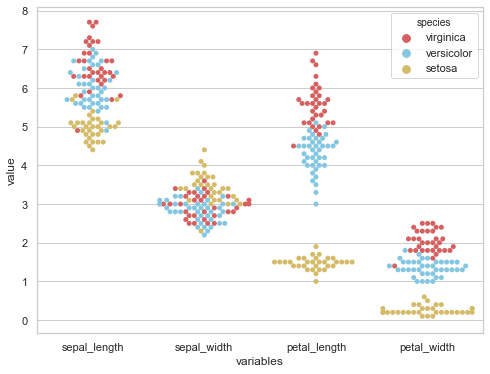

In [46]:
sns.set(style="whitegrid", palette="muted")

# "Melt" the dataset to "long-form" representation

df_melt = pd.melt(iris_train[['sepal_length','sepal_width','petal_length', 'petal_width', 'species']], "species", var_name="variables")

plt.figure(figsize = (8,6))

# Draw a categorical scatterplot to show each observation
p = sns.swarmplot(x="variables", y="value", hue='species', palette=["r", "c", "y"], data=df_melt)
#p.set(yscale="log")

plt.show()

3. Create 4 subplots (2 rows x 2 columns) of scatterplots

sepal_length x sepal_width

petal_length x petal_width

sepal_area x petal_area

sepal_length x petal_length

What are your takeaways?

In [47]:
# Create new columns that for sepal_area and petal_area

In [52]:
iris_train['sepal_area'] = iris_train.sepal_length * iris_train.sepal_width
iris_train['petal_area'] = iris_train.petal_length * iris_train.petal_width

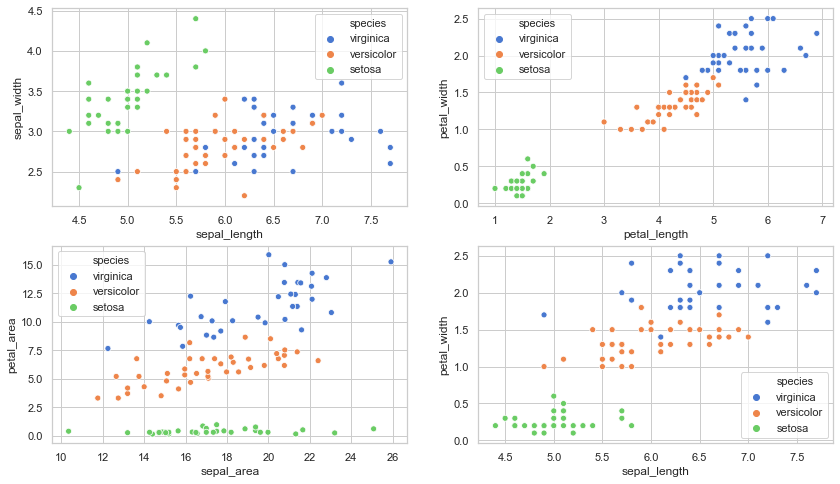

In [63]:
_, ax = plt.subplots(nrows=2, ncols=2, figsize=(14,8))

plt.subplot(2, 2, 1)
sns.scatterplot(x="sepal_length", y="sepal_width", hue='species',data = iris_train)

plt.subplot(2, 2, 2)
sns.scatterplot(x="petal_length", y="petal_width", hue='species', data = iris_train)

plt.subplot(2, 2, 3)
sns.scatterplot(x="sepal_area", y="petal_area", hue='species', data = iris_train)

plt.subplot(2, 2, 4)
sns.scatterplot(x="sepal_length", y="petal_width", hue='species',data = iris_train)

4. Create a heatmap of each variable layering correlation coefficient on top

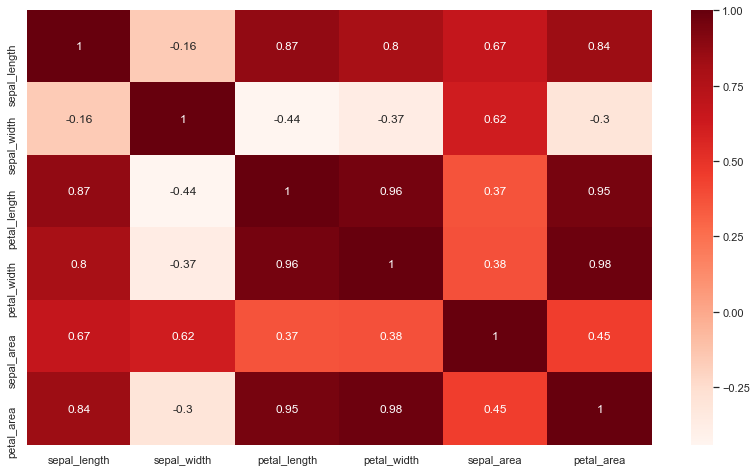

In [65]:
plt.figure(figsize = (14, 8))

sns.heatmap(iris_train.corr(), cmap='Reds', annot = True)

5. Create a scatter matrix visualizing the interaction of each variable

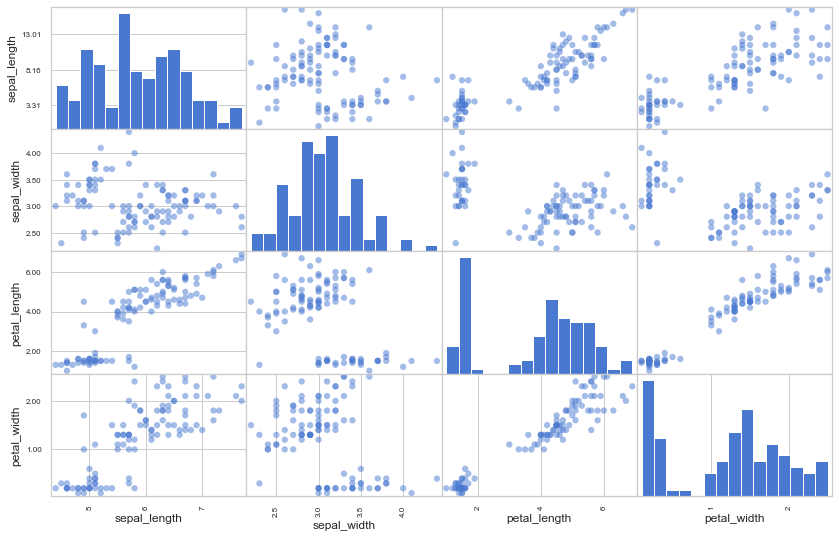

In [66]:
from matplotlib import cm
from matplotlib.ticker import FormatStrFormatter

cmap = cm.get_cmap('gnuplot')
axes = pd.plotting.scatter_matrix(
    iris_train[['sepal_length','sepal_width','petal_length', 'petal_width']], marker='o', s=40,
    hist_kwds={'bins':15},  figsize=(14,9), cmap=cmap)
for ax in axes.flatten():
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))


# axes = pd.plotting.scatter_matrix(df, alpha=0.3, figsize=(9,9), diagonal='kde')
# for ax in axes.flatten():
#    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f')) 

6. Is the sepal length significantly different in virginica compared to versicolor? Run an experiment to test this.

- Must include null hypothesis, alternative hypothesis, t-test, results, summary
- H
0
: the difference in sepal length between virginica and versicolor is insignificant.
- H
a
: the difference in sepal length between virginica and versicolor is substantial.
- We will test if the sepal length of virginica is significantly different than that of the versicolor.
- If there is difference, then variable sepal_length is a good choice to keep as a feature.
- We can use a t-test here, as sepal_length is somewhat normally distributed.